In [2]:
## authorize access to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# navigate to project directory
%cd '/content/drive/My Drive/Colab Notebooks/Proj'
# %cd '/content/drive/My Drive/Proj/'

/content/drive/My Drive/Colab Notebooks/Proj


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# with open("checkpoint/lables1_12.txt",'r') as f:
#   t = f.read()
# l_t = list(t)
# l_t.insert(t.index('}')+1,'\n')
# t = ''.join(l_t).split('\n')
# v1=eval(t[0])
# v2=eval(t[-1])
# training = []
# a=0
# for key in v1.keys():
#   training.append(v1[key]/v2[key])
# for v in training:
#   a+=v
# a = a/len(training)
# print(a)

In [9]:
file_list = os.listdir("result")
for index,file in enumerate(file_list):
  with open(os.path.join("result",file),'r') as f:
    t = f.read()
  t = eval(t)
  training = []
  a=0
  for v in t.values():
    a += v
    training.append(v)
  a = a/len(training)
  print("{}:{}".format(index+1,a))

1:75.28333495394183
2:84.90814186479437
3:91.35446876933337
4:92.77917669865394
5:93.92055306998445
6:95.21373750091627
7:94.37606774397224
8:94.65450570978487
9:95.47842385387752
10:96.60165557479957
11:96.74226441195044
12:96.587817894644
13:96.33098035296314
14:97.29225115282034
15:96.666691582972
16:96.31857033756062
17:96.50994835232564
18:97.3192471742701
19:97.697796351619
20:97.29339973441313


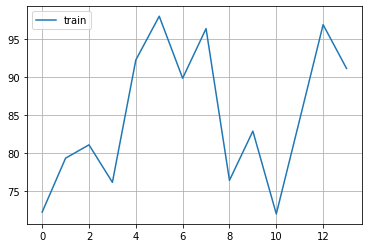

In [18]:

window_length = 1
train_s = np.r_[
    training[window_length - 1 : 0 : -1], training, training[-1:-window_length:-1]
]
# test_s = np.r_[
#     testing[window_length - 1 : 0 : -1], testing, testing[-1:-window_length:-1]
# ]
w = np.hamming(window_length)
train_y = np.convolve(w / w.sum(), train_s, mode="valid") # Numpy 中的卷积函数
# test_y = np.convolve(w / w.sum(), test_s, mode="valid")

# Display the training accuracies.
x = np.arange(0, len(train_y), 1)
# plt.plot(x, train_y, x, test_y)
plt.plot(x,train_y)
# plt.plot(training)
# plt.legend(["train","test"])
plt.legend(["train"])
plt.grid()